In [4]:
import pandas as pd
names = pd.read_csv('NameData/yob2017.txt', index_col=0,header=None)


In [5]:
%matplotlib inline

In [6]:
names.columns=['Sex','NumberB']
names.rename_axis('Name')
print(names)


          Sex  NumberB
0                     
Emma        F    19738
Olivia      F    18632
Ava         F    15902
Isabella    F    15100
Sophia      F    14831
Mia         F    13437
Charlotte   F    12893
Amelia      F    11800
Evelyn      F    10675
Abigail     F    10551
Harper      F    10451
Emily       F     9746
Elizabeth   F     8915
Avery       F     8186
Sofia       F     8134
Ella        F     8014
Madison     F     7847
Scarlett    F     7679
Victoria    F     7267
Aria        F     7132
Grace       F     6991
Chloe       F     6912
Camila      F     6752
Penelope    F     6639
Riley       F     6343
Layla       F     6274
Lillian     F     6132
Nora        F     6036
Zoey        F     6026
Mila        F     5941
...        ..      ...
Zayer       M        5
Zayir       M        5
Zechari     M        5
Zecharia    M        5
Zee         M        5
Zeid        M        5
Zennith     M        5
Zeo         M        5
Zerrick     M        5
Zevon       M        5
Zhen       

In [7]:
names.sort_values(by=['NumberB']).tail(10)

,Sex,NumberB
0,,
Logan,M,13974
James,M,14232
Sophia,F,14831
William,M,14904
Isabella,F,15100
Ava,F,15902
Noah,M,18326
Olivia,F,18632
Liam,M,18728


Number of rows and columns

In [8]:
names.shape

(32469, 2)

Calculate the total number of births in one year

In [9]:
names[['NumberB']].sum()

NumberB    3546301
dtype: int64

Calculate the top 10 percentages of all births

In [10]:
names.sort_values(by=['NumberB']).tail(10)

,Sex,NumberB
0,,
Logan,M,13974
James,M,14232
Sophia,F,14831
William,M,14904
Isabella,F,15100
Ava,F,15902
Noah,M,18326
Olivia,F,18632
Liam,M,18728


Create a bar plot with 5 names from one year

In [11]:
namesFive = names.sort_values(by=['NumberB']).tail(5)

In [12]:
#namesFive.index

In [13]:
#namesFive.plot.bar()

In [14]:
namesFive.set_index(namesFive.index,drop=True,inplace=True)

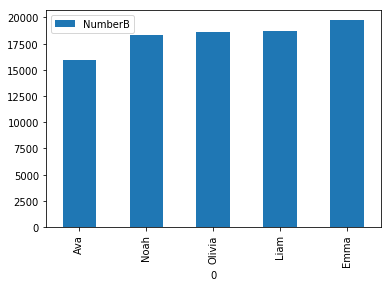

In [15]:
plot =namesFive.plot.bar()
fig = plot.get_figure()
#matplotlib inline
fig.savefig("top5.png")

Plot a time series with one name over all years

In [16]:
import os
#locating the data
path = '/Users/julianchan/Desktop/names/NameData/'
file_list = os.listdir(path)
file_list
#create empty data frame
DataFrame = []
for fi in file_list:
    #if fi.endswith(".txt"):
    full_path = path + fi
    
    ##load file as a DataFrame
    colnames=['NAME','GENDER', 'NUMBER']
    data_df = pd.read_csv(full_path, names = colnames)
    data_df.set_index('NAME',inplace=True)
    ##add a file_name column to data_df
    data_df["YEAR"] = int(fi[3:7])
    
    ##add file into list
    DataFrame.append(data_df)
    
#Show the contents of DataFrame
DataFrame
#concatenate
big_data_frame = pd.concat(DataFrame)




In [17]:
big_data_frame.head(10)

,GENDER,NUMBER,YEAR
NAME,,,
Emily,F,25953,2000
Hannah,F,23080,2000
Madison,F,19967,2000
Ashley,F,17997,2000
Sarah,F,17697,2000
Alexis,F,17629,2000
Samantha,F,17266,2000
Jessica,F,15709,2000
Elizabeth,F,15094,2000


In [18]:
big_data_frame.loc['Julian'].head(5)

,GENDER,NUMBER,YEAR
NAME,,,
Julian,F,104,2000
Julian,M,4589,2000
Julian,F,31,2014
Julian,M,7665,2014
Julian,F,7,1938


In [19]:
Julian = big_data_frame.loc['Julian']
Male   = Julian[Julian['GENDER'] == 'M']
#big_data_frame[(big_data_frame.loc['Julian']) & 
#               (big_data_frame[big_data_frame['GENDER']] == 'M')]

Male.head(5)

,GENDER,NUMBER,YEAR
NAME,,,
Julian,M,4589,2000
Julian,M,7665,2014
Julian,M,425,1938
Julian,M,129,1910
Julian,M,65,1904


Plot a time series with one name over all years

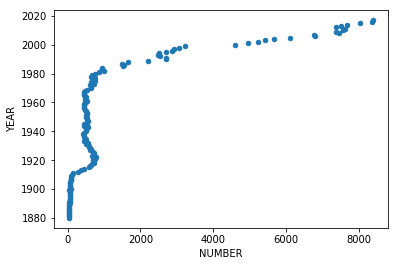

In [20]:
Male.plot.scatter('NUMBER','YEAR')

Plot the number of distinct boy/girl names over time

In [21]:
info = big_data_frame[['YEAR','GENDER']]
infoM = info[info['GENDER'] == 'M']
infoF = info[info['GENDER'] == 'F']

In [22]:
infoM['YEAR'].value_counts()
infoF['YEAR'].value_counts()

2007    20560
2008    20457
2009    20179
2006    20050
2010    19811
2011    19560
2012    19498
2013    19231
2005    19182
2014    19181
2015    19074
2004    18826
2016    18817
2003    18430
2017    18309
2002    18081
2001    17970
2000    17653
1999    16941
1998    16598
1997    16160
1996    15891
1993    15797
1995    15753
1994    15751
1992    15611
1991    15459
1990    15235
1989    14546
1988    13877
        ...  
1909     2548
1908     2434
1907     2399
1905     2234
1900     2224
1906     2220
1904     2165
1903     2083
1902     2042
1898     1975
1901     1943
1899     1842
1896     1825
1895     1808
1897     1799
1894     1702
1892     1661
1893     1652
1890     1534
1891     1533
1889     1479
1888     1474
1887     1306
1886     1282
1885     1197
1884     1172
1883     1054
1882     1028
1880      942
1881      938
Name: YEAR, Length: 138, dtype: int64

plot the number of distinct boy/girl names over time

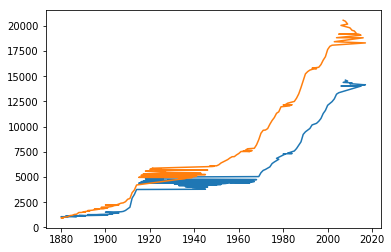

In [23]:
infoM['YEAR'].value_counts().plot()
infoF['YEAR'].value_counts().plot()

In [24]:
X = Male['YEAR'].values.reshape(-1, 1)
Y = Male['NUMBER'].values

In [25]:
X.shape,Y.shape

((138, 1), (138,))

In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,Y)
reg.coef_
reg.intercept_
w = reg.predict(X) #YOu may uncomment this to see the fitted values 
#Note the negative scores for some years! 
#This implies linear model is not a good model

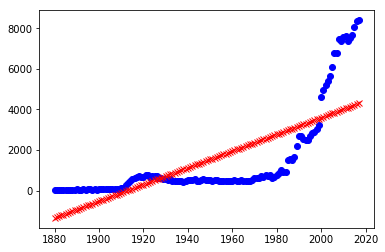

In [72]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(X, Y, 'bo')
plt.plot(X, w, 'rx')
plt.show()

Normalize the data by the total number of births

In [35]:
from sklearn.preprocessing import normalize
normalize(Y.reshape(1,-1))
#Output looks weird
#import statistics 
#y = (Y - np.mean(Y)) / (statistics.stdev(Y)) 
#This looks a lot better!

array([[0.14650774, 0.24471166, 0.01356849, 0.00411844, 0.00207518,
        0.00249022, 0.00485273, 0.01459011, 0.25655616, 0.15777757,
        0.26795368, 0.17268694, 0.00293718, 0.01149331, 0.00220288,
        0.00143666, 0.0093862 , 0.00325644, 0.16674873, 0.26705976,
        0.23542124, 0.21684039, 0.0019794 , 0.01998558, 0.00156437,
        0.00150052, 0.02081566, 0.00188363, 0.21632958, 0.23973123,
        0.19513081, 0.2431473 , 0.01848507, 0.00210711, 0.01890011,
        0.02024099, 0.00252214, 0.01433471, 0.24187026, 0.18101959,
        0.02292276, 0.01436663, 0.09746963, 0.10267354, 0.01443049,
        0.01992173, 0.01468589, 0.01625026, 0.02033677, 0.02056025,
        0.01471782, 0.01471782, 0.01676107, 0.02381669, 0.01701648,
        0.01701648, 0.0207518 , 0.01570752, 0.02343358, 0.01522863,
        0.07058806, 0.05338003, 0.015069  , 0.02381669, 0.0166653 ,
        0.01672915, 0.08588054, 0.04875078, 0.02994645, 0.08613595,
        0.01762307, 0.01656952, 0.02119877, 0.01

In [60]:
#infoM.head(3)
infoM['YEAR'].value_counts().head(3)


2008    14613
2009    14523
2007    14390
Name: YEAR, dtype: int64

In [67]:
infoM['YEAR'].head(3)

NAME
Jacob      2000
Michael    2000
Matthew    2000
Name: YEAR, dtype: int64

Improve the fit using a polynomial regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures
lin_regressor = LinearRegression()
poly = PolynomialFeatures(2)
X_transform = poly.fit_transform(X)
poly = lin_regressor.fit(X_transform,Y)
poly.coef_


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
z=poly.predict(X_transform)

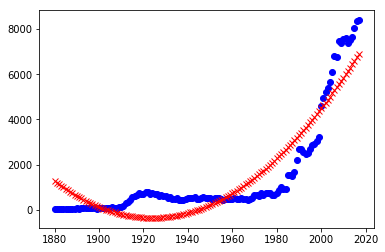

In [66]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(X, Y, 'bo')
plt.plot(X, z, 'rx')
plt.show()

Notes from class

In [30]:
#df['count'][.loc['Nicholas','Paul','Helena','Tom']]
#df[df['count'] > 1000].head(3)
#freq_boys = df[(df['count']>1000) & (df[df['gender']] ) ]
#b = df[df['gender']] != 'F'
#df.isna()
#df.dropna()
